## Nama: Juniver Veronika Lili
## NIM: 2209106013
## Kelas: A1 22
## Kecerdasan Buatan
### Link Dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10


#####MengiInstall Dataset langsung dari *kaggle*

In [1]:
!pip install -q Kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alessiocorrado99/animals10

100% 584M/586M [00:28<00:00, 23.6MB/s]
100% 586M/586M [00:28<00:00, 21.4MB/s]


##### Melakukan Unzip pada file 'animals.zip'

In [5]:
!unzip 'animals10.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-

##### Membuat folder dengan nama folder dataset-final

In [6]:
!mkdir dataset-final

##### Menyalin 3 kategori/class yang ada dalam direktori 'raw-img' ke dalam direktori 'dataset-final'

In [7]:
!cp -r 'raw-img/cane/' dataset-final/
!cp -r raw-img/cavallo/ dataset-final/
!cp -r raw-img/elefante/ dataset-final/

##### Menginstall

In [8]:
!pip install split-folders

##### Mengimport

In [9]:
import splitfolders

##### Membagi data menjadi test, train dan validasi dengan ratio 80%, 10%, 10% di dalam file baru yaitu animals.



In [10]:
splitfolders.ratio ("dataset-final",
                    output="animals",
                    seed=1337,
                    ratio=(.8, .1, .1))

Copying files: 8932 files [00:01, 7236.43 files/s]


##### Mengimport library

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Mengolah data gambar dengan 'ImageDataGenerator' dengan membuat variabel 'train_datagen' dan 'valtest_datagen'

In [12]:
train_datagen = ImageDataGenerator(
                rescale=1/255,
                horizontal_flip=True,
                width_shift_range=0.2,
                height_shift_range=0.2,
                brightness_range = (0.3, 0.9),
                zoom_range=0.2)

valtest_datagen = ImageDataGenerator(
                rescale=1/255)


##### Menggunakan Variabel yang telah di buat kedalam 'train_generator', 'val_generator' dan 'test_generator'

In [13]:
train_generator = train_datagen.flow_from_directory(
    # copy path folder
    '/content/animals/train',
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

val_generator = valtest_datagen.flow_from_directory(
    '/content/animals/val',
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

test_generator = valtest_datagen.flow_from_directory(
    '/content/animals/test',
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)


Found 7144 images belonging to 3 classes.
Found 892 images belonging to 3 classes.
Found 896 images belonging to 3 classes.


##### import library

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

##### Menggunakan model sequential dengan 13 layer menggunakan activation relu dan pada input_shape nya sebanyak (300, 300, 3).

In [15]:

model = Sequential([
    #Feature extraction layer
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 64)        0

##### Menggunakan CallsBacks

In [17]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights = True)

##### Melakukan model compile dengan loss categorical_crossentropy karena pada class mode dibagian sebelumnya menggunakan categorical, optimizer nya menggunakan adam dan metrics accuracy.

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

##### Membuat variabel fitmodel yang berisi model fit dengan melakukan iterasi sebanyak 15 kali dan beberapa fungsi lain yang berada di bawah ini.

In [20]:
fitmodel = model.fit(train_generator,
            validation_data = val_generator,
            epochs=15,
            verbose = 1,
            callbacks=[callback])

Epoch 1/15
112/112 [==============================] - 178s 2s/step - loss: 0.6500 - accuracy: 0.7311 - val_loss: 0.5664 - val_accuracy: 0.7780
Epoch 2/15
112/112 [==============================] - 181s 2s/step - loss: 0.5955 - accuracy: 0.7602 - val_loss: 0.6251 - val_accuracy: 0.7870
Epoch 3/15
112/112 [==============================] - 187s 2s/step - loss: 0.5858 - accuracy: 0.7609 - val_loss: 0.5969 - val_accuracy: 0.7735
Epoch 4/15
112/112 [==============================] - 201s 2s/step - loss: 0.5448 - accuracy: 0.7835 - val_loss: 0.5326 - val_accuracy: 0.8004
Epoch 5/15
112/112 [==============================] - 193s 2s/step - loss: 0.5423 - accuracy: 0.7868 - val_loss: 0.5173 - val_accuracy: 0.8016
Epoch 6/15
112/112 [==============================] - 190s 2s/step - loss: 0.4890 - accuracy: 0.8089 - val_loss: 0.4344 - val_accuracy: 0.8307
Epoch 7/15
112/112 [==============================] - 189s 2s/step - loss: 0.4996 - accuracy: 0.8039 - val_loss: 0.4574 - val_accuracy: 0.8139

##### Hasil Akhir akurasi 0.8694196343421936

In [21]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss:", loss)
print("Accuracy:", accuracy)

14/14 [==============================] - 3s 200ms/step - loss: 0.3602 - accuracy: 0.8694
Loss: 0.36017730832099915
Accuracy: 0.8694196343421936


##### Import library

In [22]:
import matplotlib.pyplot as plt

##### Membuat dan menampilkan grafik dari training dan validasi akurasi dan juga training dan validasi loss.

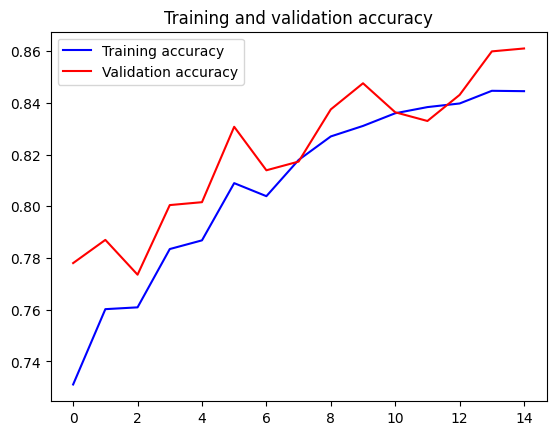

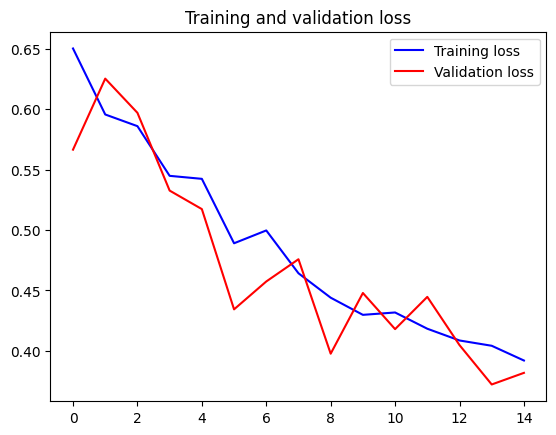

In [23]:
accuracy = fitmodel.history['accuracy']
val_accuracy = fitmodel.history['val_accuracy']

loss = fitmodel.history['loss']
val_loss = fitmodel.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()